In [1]:
import main_module as md
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import rc
rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
rc('text', usetex=True)

main module is loaded
c:\Users\rzhang98\source\repos\CIBMTR_post_hct_survival\scripts\main_module.py


In [2]:
hct_df = md.hct("../data/train.csv")
# hct_df.data.head()
hct_df.raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28800 entries, 0 to 28799
Data columns (total 60 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID                      28800 non-null  int64  
 1   dri_score               28646 non-null  object 
 2   psych_disturb           26738 non-null  object 
 3   cyto_score              20732 non-null  object 
 4   diabetes                26681 non-null  object 
 5   hla_match_c_high        24180 non-null  float64
 6   hla_high_res_8          22971 non-null  float64
 7   tbi_status              28800 non-null  object 
 8   arrhythmia              26598 non-null  object 
 9   hla_low_res_6           25530 non-null  float64
 10  graft_type              28800 non-null  object 
 11  vent_hist               28541 non-null  object 
 12  renal_issue             26885 non-null  object 
 13  pulm_severe             26665 non-null  object 
 14  prim_disease_hct        28800 non-null

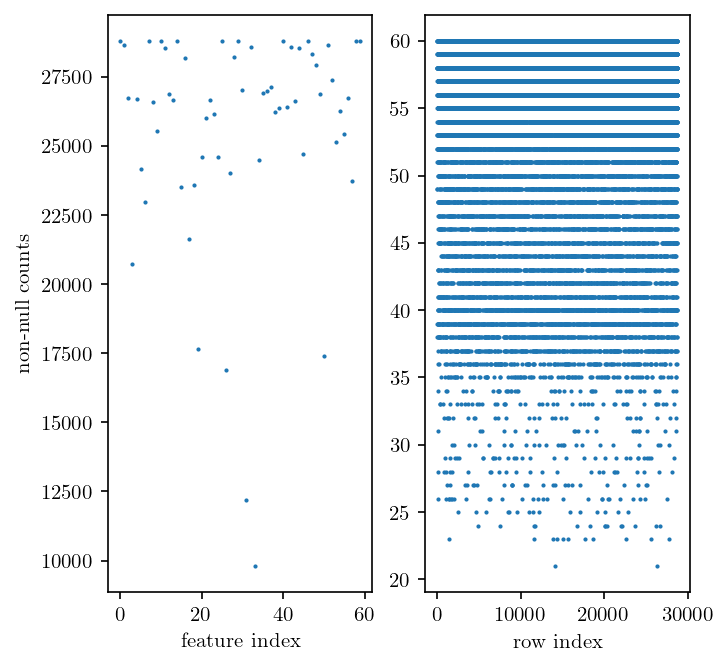

In [3]:
# plot the number of non-null entries against the features.
fig, ax = plt.subplots(figsize = (5,5), dpi = 150, nrows = 1, ncols = 2)
ax[0].scatter(np.arange(hct_df.raw_data.shape[1]), hct_df.raw_data.count(), s = 1.0)
ax[0].set_xlabel('feature index')
ax[0].set_ylabel('non-null counts')

ax[1].scatter(np.arange(hct_df.raw_data.shape[0]), hct_df.raw_data.count(axis = 1), s = 1.0)
ax[1].set_xlabel('row index')
plt.show()

In [4]:
# apply dropna
hct_df.raw_data.dropna().count()

ID                        1974
dri_score                 1974
psych_disturb             1974
cyto_score                1974
diabetes                  1974
hla_match_c_high          1974
hla_high_res_8            1974
tbi_status                1974
arrhythmia                1974
hla_low_res_6             1974
graft_type                1974
vent_hist                 1974
renal_issue               1974
pulm_severe               1974
prim_disease_hct          1974
hla_high_res_6            1974
cmv_status                1974
hla_high_res_10           1974
hla_match_dqb1_high       1974
tce_imm_match             1974
hla_nmdp_6                1974
hla_match_c_low           1974
rituximab                 1974
hla_match_drb1_low        1974
hla_match_dqb1_low        1974
prod_type                 1974
cyto_score_detail         1974
conditioning_intensity    1974
ethnicity                 1974
year_hct                  1974
obesity                   1974
mrd_hct                   1974
in_vivo_

In [5]:
sorted_indices = np.argsort(hct_df.raw_data.count().to_numpy())
top_num = 5
print(f"top {top_num} features with many missing values:", hct_df.raw_data.columns[sorted_indices[:top_num]])
print(hct_df.raw_data[hct_df.raw_data.columns[sorted_indices[:top_num]]].count())

top 5 features with many missing values: Index(['tce_match', 'mrd_hct', 'cyto_score_detail', 'tce_div_match',
       'tce_imm_match'],
      dtype='object')
tce_match             9804
mrd_hct              12203
cyto_score_detail    16877
tce_div_match        17404
tce_imm_match        17667
dtype: int64


In [6]:
hct_df.data = hct_df.raw_data.drop(hct_df.raw_data.columns[sorted_indices[:top_num]], axis = 1)
hct_df.data.dropna().info()

<class 'pandas.core.frame.DataFrame'>
Index: 10606 entries, 1 to 28796
Data columns (total 55 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID                      10606 non-null  int64  
 1   dri_score               10606 non-null  object 
 2   psych_disturb           10606 non-null  object 
 3   cyto_score              10606 non-null  object 
 4   diabetes                10606 non-null  object 
 5   hla_match_c_high        10606 non-null  float64
 6   hla_high_res_8          10606 non-null  float64
 7   tbi_status              10606 non-null  object 
 8   arrhythmia              10606 non-null  object 
 9   hla_low_res_6           10606 non-null  float64
 10  graft_type              10606 non-null  object 
 11  vent_hist               10606 non-null  object 
 12  renal_issue             10606 non-null  object 
 13  pulm_severe             10606 non-null  object 
 14  prim_disease_hct        10606 non-null  obj

In [7]:
hct_df.clean(method="fdrop", params= 10)
hct_df.data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12793 entries, 1 to 28796
Data columns (total 50 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID                      12793 non-null  int64  
 1   dri_score               12793 non-null  object 
 2   psych_disturb           12793 non-null  object 
 3   diabetes                12793 non-null  object 
 4   hla_match_c_high        12793 non-null  float64
 5   tbi_status              12793 non-null  object 
 6   arrhythmia              12793 non-null  object 
 7   hla_low_res_6           12793 non-null  float64
 8   graft_type              12793 non-null  object 
 9   vent_hist               12793 non-null  object 
 10  renal_issue             12793 non-null  object 
 11  pulm_severe             12793 non-null  object 
 12  prim_disease_hct        12793 non-null  object 
 13  cmv_status              12793 non-null  object 
 14  hla_nmdp_6              12793 non-null  flo

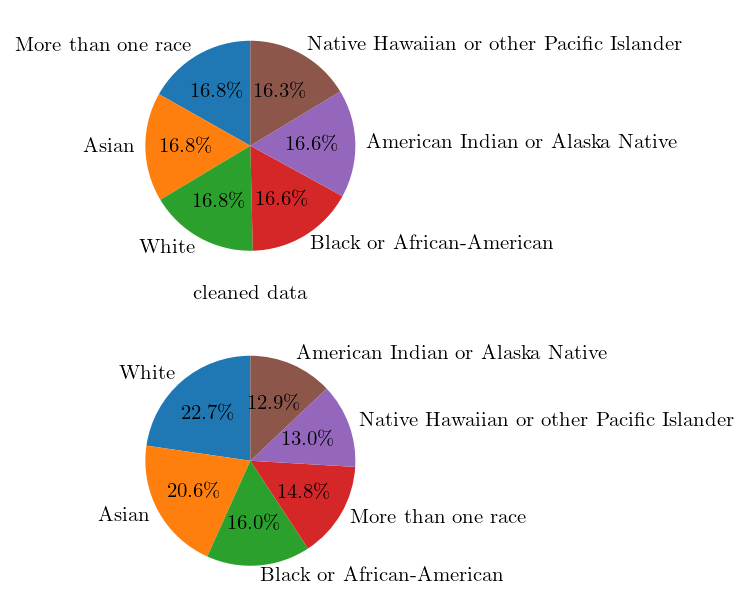

In [12]:
# a pie chart of race
race_raw_counts = hct_df.raw_data['race_group'].value_counts()
race_clean_counts = hct_df.data['race_group'].value_counts()

fig, ax = plt.subplots(figsize = (8,5), dpi = 150, nrows = 2, ncols = 1)
ax[0].pie(race_raw_counts, labels= race_raw_counts.index, autopct='%1.1f%%', startangle=90)
ax[0].set_xlabel("raw data")
ax[1].pie(race_clean_counts, labels= race_clean_counts.index, autopct='%1.1f%%', startangle=90)
ax[0].set_xlabel("cleaned data")
plt.show()

13268 15532


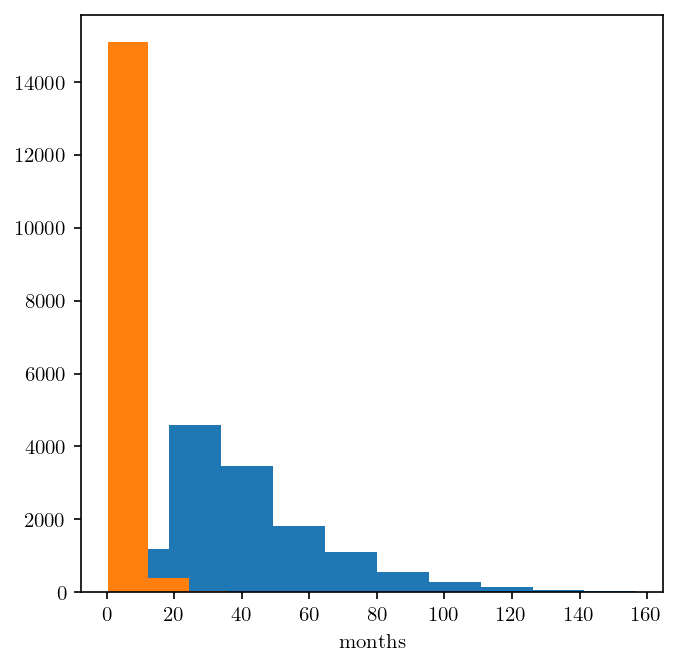

In [21]:
df0 = hct_df.raw_data[hct_df.raw_data['efs'] == 0]
df1 = hct_df.raw_data[hct_df.raw_data['efs'] == 1]
print(len(df0.index), len(df1.index))
fig, ax = plt.subplots(figsize = (5,5), dpi = 150, nrows = 1, ncols = 1)
ax.hist(df0['efs_time'], label= "observed")
ax.hist(df1['efs_time'], label= "censored")
ax.set_xlabel("months")
plt.show()